# Creating replicates of an experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../src")

from stochastic_glv_generator import *
from experiments import *

## Generating replicates

In [11]:
n = 5
seed = 123
r_max = 1.
A_diag_std = 1.
A_off_diag_std = 10.
p = sort_glv_params(n, seed, r_max, A_diag_std, A_off_diag_std)

np.random.seed(0)
init_perturb_list = np.array([1.])
t_samp_list = [np.sort(np.random.uniform(0, 30, 1000)) for i in range(5)]
meas_noise_list = np.array([0.])
repetitions = 1

env_noise = 0.05
t0 = 0
dt = 1e-2

replicates = gen_replicates(p, env_noise, init_perturb_list, t0, dt, t_samp_list, meas_noise_list, repetitions, seed=0, scale_meas_noise_by_abund=True)
replicates

6/5                                                                                                 

,dataset,initial_perturbation,measurement_noise,time,sp1,sp2,sp3,sp4,sp5
0,0.0,1.0,0.0,0.016379,0.129722,0.815186,0.961710,0.525274,0.809292
1,0.0,1.0,0.0,0.041500,0.126514,0.805711,0.964754,0.517926,0.799192
2,0.0,1.0,0.0,0.081096,0.122948,0.797669,0.958424,0.510368,0.780153
3,0.0,1.0,0.0,0.115811,0.121431,0.797693,0.949419,0.504524,0.765810
4,0.0,1.0,0.0,0.140864,0.120525,0.797933,0.945870,0.507398,0.749427
...,...,...,...,...,...,...,...,...,...
4995,4.0,1.0,0.0,29.784603,0.000000,0.409102,0.515641,0.267764,0.352186
4996,4.0,1.0,0.0,29.808735,0.000000,0.410621,0.512775,0.270059,0.349063
4997,4.0,1.0,0.0,29.871230,0.000000,0.408699,0.518751,0.274365,0.353569
4998,4.0,1.0,0.0,29.874382,0.000000,0.408699,0.518751,0.274365,0.353569


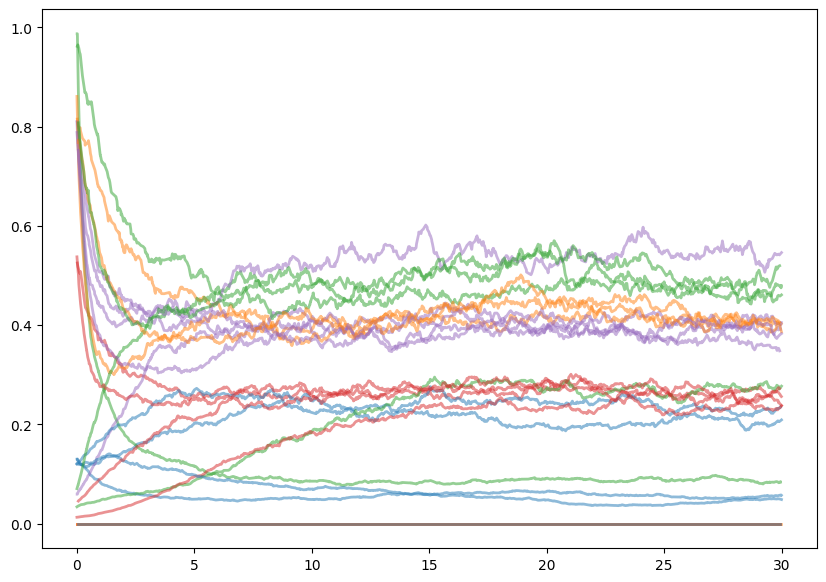

In [12]:
n_sp = sum(["sp" in col for col in replicates.columns])

plt.figure(figsize=(10, 7))
for dataset_num in replicates.dataset.unique():
    for sp in range(n):
        plt.plot(replicates[replicates.dataset==dataset_num].time, replicates[replicates.dataset==dataset_num][f"sp{sp+1}"], "-", c=f"C{sp}", lw=2, alpha=0.5)